In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import linregress

In [34]:
data = pd.read_csv('clean_data.csv')

In [35]:
data.head()

,Response ID,Job Experience,Time Spent Remote,Company encouraged remote work,WFH collaboration ease,WFH personal recommendation,WFH time preference,In person - commute time,In person - time working,In person - family time,Remote - commute time,WFH - working,WFH - family time,WFH - domestic work time,productivity
0,3,More than 5 years,60,4,3,3,60,6.0,1.0,6.0,5.0,2.0,7.0,7.0,1.20
1,4,Between 1 and 5 years,20,1,4,4,100,1.0,9.0,1.0,0.0,9.0,3.0,2.0,0.20
2,5,More than 5 years,5,1,5,4,60,1.0,8.0,13.0,0.0,6.0,15.0,3.0,-0.05
3,6,Between 1 and 5 years,5,4,5,5,50,1.0,8.0,2.0,0.0,7.0,3.0,3.0,0.00
4,8,Between 6 and 12 months,80,5,4,4,80,1.0,8.0,4.0,0.4,6.0,4.0,6.0,-1.12


Text(0.5, 1.0, 'Preference of Time Working Remotely')

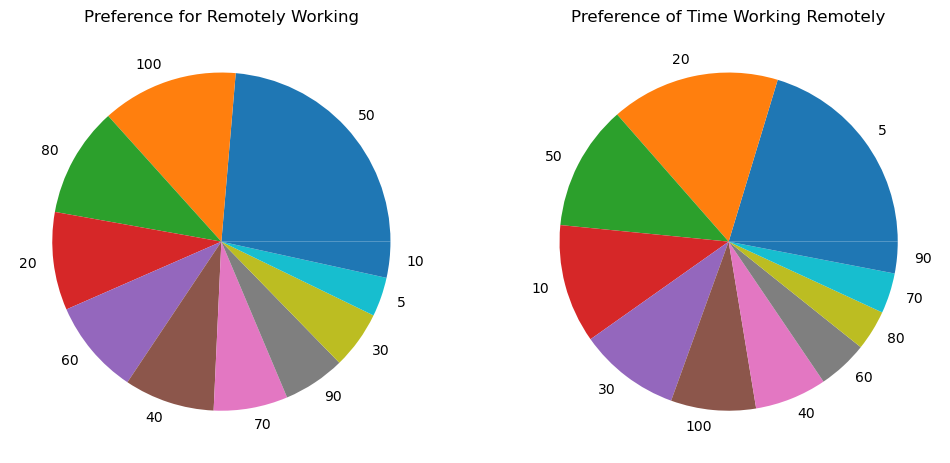

In [17]:
column = 'Time Spent Remote'
count = data[column].value_counts()

column2 = 'WFH time preference'
count2 = data[column2].value_counts()


fig, axs = plt.subplots(1, 2, figsize = (12, 12))
axs[0].pie(count2, labels = count2.index)
axs[0].set_title('Preference for Remotely Working')
axs[1].pie(count, labels = count.index)
axs[1].set_title('Preference of Time Working Remotely')

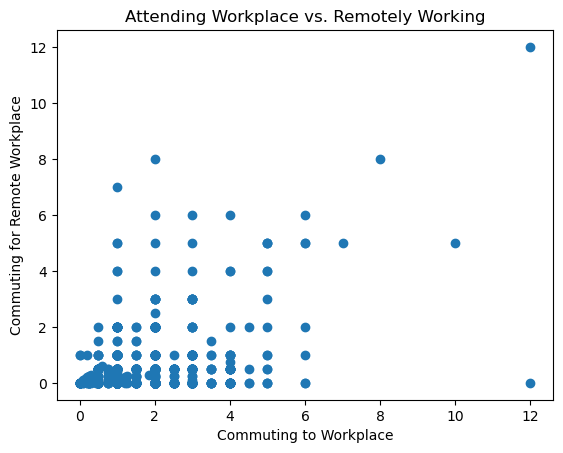

In [18]:
plt.scatter(data["In person - commute time "], data["Remote - commute time"])
plt.xlabel('Commuting to Workplace')
plt.ylabel('Commuting for Remote Workplace')
plt.title('Attending Workplace vs. Remotely Working')
plt.show()

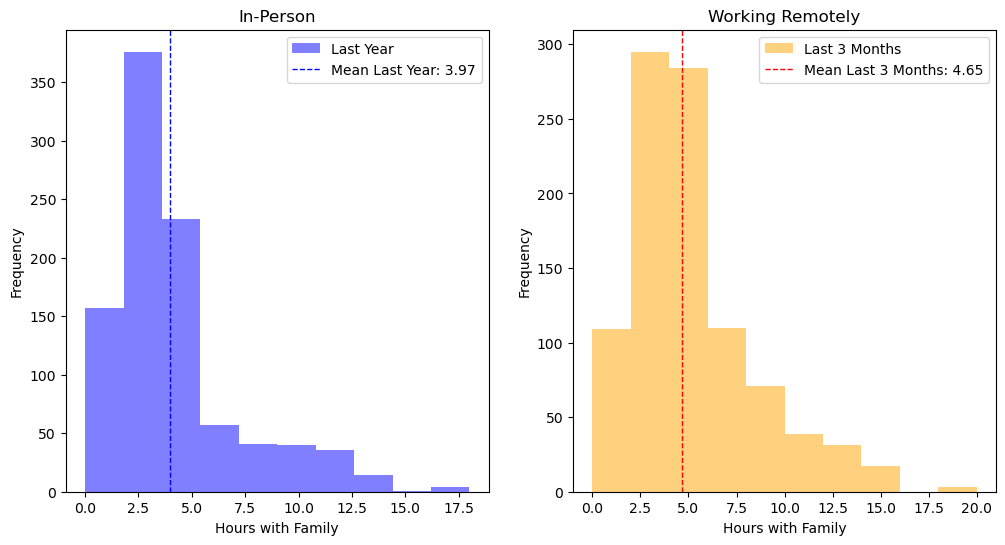

In [39]:
#Family time data for the two time periods
in_person = data["In person - family time"]
from_home = data["WFH - family time"]

# Mean family time levels
mean_in_person = in_person.mean()
mean_from_home = from_home.mean()

fig, axs = plt.subplots(1, 2, figsize = (12, 6))
axs[0].hist(in_person, alpha=0.5, color = 'blue', label='Last Year')
axs[1].hist(from_home, alpha=0.5, color = 'orange', label='Last 3 Months')

# Highlighting the family time levels
axs[0].axvline(mean_in_person, color='blue', linestyle='dashed', linewidth=1, label=f'Mean Last Year: {mean_in_person:.2f}')
axs[1].axvline(mean_from_home, color='red', linestyle='dashed', linewidth=1, label=f'Mean Last 3 Months: {mean_from_home:.2f}')

axs[0].set_xlabel('Hours with Family')
axs[0].set_ylabel('Frequency')
axs[0].set_title('In-Person')
axs[1].set_xlabel('Hours with Family')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Working Remotely')
axs[0].legend()
axs[1].legend()

plt.show()

In [ ]:
#data['productivity'] = (data['Time Spent Remote']/100)*((data['WFH - working'] - data['In person - time working']) + (data['In person - commute time '] - data['Remote - commute time']))



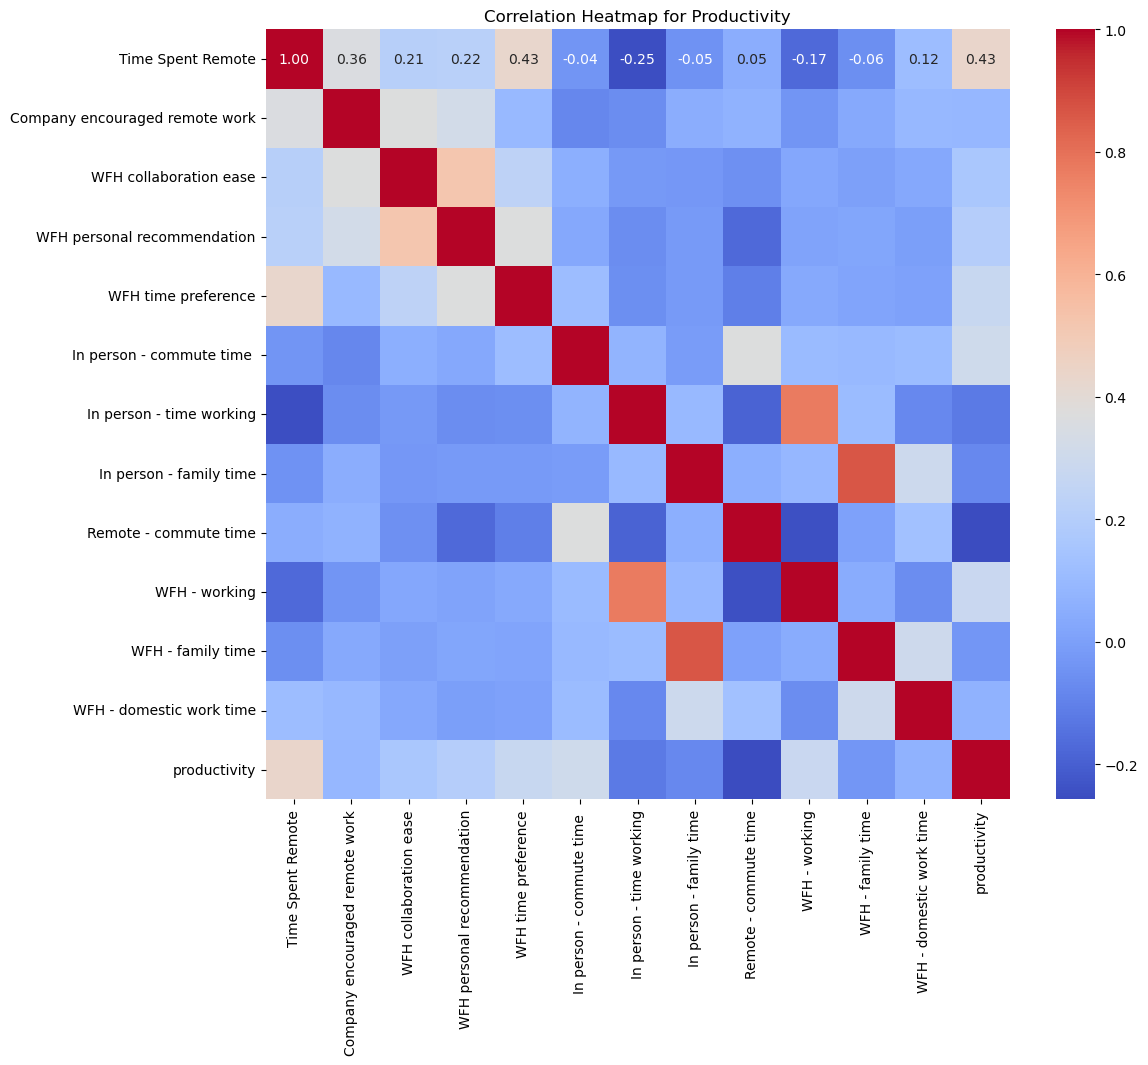

In [40]:
selected_columns = data[['Time Spent Remote','Company encouraged remote work','WFH collaboration ease',
                        'WFH personal recommendation','WFH time preference','In person - commute time ',
                        'In person - time working','In person - family time','Remote - commute time','WFH - working',
                        'WFH - family time','WFH - domestic work time', 'productivity']]

selected_columns_encoded = pd.get_dummies(selected_columns)
correlation_matrix = selected_columns_encoded.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap for Productivity')
plt.show()

In [11]:
print(df.columns)

Index(['Response ID', 'What year were you born?', 'What is your gender?',
       'Which of the following best describes your industry?',
       'Which of the following best describes your industry? (Detailed)',
       'Which of the following best describes your current occupation?',
       'Which of the following best describes your current occupation? (Detailed)',
       'How many people are currently employed by your organisation?',
       'Do you manage people as part of your current occupation?',
       'Which of the following best describes your household?',
       'How long have you been in your current job?', 'Metro / Regional',
       'Thinking about your current job, how much of your time did you spend remote working last year?',
       'Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - My organisation encouraged people to work remotely',
       'Thinking about remote working last year, how strongly do you agree or 

In [10]:
print(df2.columns)

Index(['Response ID', 'What year were you born?  ', 'What is your gender?  ',
       'How long have you been in your current job?  If you have more than one job, please answer all questions for your main job.  ',
       'Which of the following best describes your industry?  ',
       'Which of the following best describes your current occupation?  ',
       'How many people are currently employed by your organisation?   ',
       'Which of the following best describes your household?  ',
       'Metro or Regional',
       'Thinking about your current job, how much of your work time did you spend working remotely in the last quarter of last year?   This means October-December 2020  If you work a 5 day week, each day of remote working equals 20% of your time.  ',
       ...
       'How strongly do you agree or disagree with the following statements?    - Offering remote work helps me retain employees',
       'How strongly do you agree or disagree with the following statements?    - Offe